# Language Technology - 2nd Tutorial on Scikit learn 


----
## Important Resources

Language Technology Resources: https://eclass.aueb.gr/modules/document/index.php?course=INF210

Python Official Documentation: https://docs.python.org/3.5/

Python Tutorial: https://www.tutorialspoint.com/python/

Scikit learn: http://scikit-learn.org/

Scikit learn ("Working with text"): http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

Scikit learn ("Plot learning curves"): http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

Scikit learn ("Precision - Recall curve"): http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html

Scikit learn ("Tuning the hyper-parameters of an estimator"): http://scikit-learn.org/stable/modules/grid_search.html

----

## Tutorial 3 Schedule

**In order to familiarize ourselves with parameter tuning, we have the following sections:**

* **Load Dataset**
* **Pre-process Dataset (Feature Representation)**
* **Train Classifier**
* **Evaluation Report**
* **Learning Curves**
* **Precision - Recall Curve**
* **Parameter Tuning**


----
# Load Dataset

The dataset is called “Twenty Newsgroups”. The 20 Newsgroups data set is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups.

**Python Code Example**

In [14]:
# Import 20 news groups dataset
from sklearn.datasets import fetch_20newsgroups

# Load Dataset
dataset = fetch_20newsgroups()

for i, target_name in enumerate(dataset.target_names):
    print('{} {}'.format(i+1, target_name))

print('DATASET SIZE: {}'.format(len(dataset.data)))

1 alt.atheism
2 comp.graphics
3 comp.os.ms-windows.misc
4 comp.sys.ibm.pc.hardware
5 comp.sys.mac.hardware
6 comp.windows.x
7 misc.forsale
8 rec.autos
9 rec.motorcycles
10 rec.sport.baseball
11 rec.sport.hockey
12 sci.crypt
13 sci.electronics
14 sci.med
15 sci.space
16 soc.religion.christian
17 talk.politics.guns
18 talk.politics.mideast
19 talk.politics.misc
20 talk.religion.misc
DATASET SIZE: 11314


**Python Code Example**

In [15]:
print('SAMPLE 0, LABEL: {}'.format(dataset.target_names[dataset.target[0]]))
print('=============================')
print('{}'.format(dataset.data[0]))
print('SAMPLE 1, LABEL: {}'.format(dataset.target_names[dataset.target[1]]))
print('=============================')
print('{}'.format(dataset.data[1]))

SAMPLE 0, LABEL: rec.autos
From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





SAMPLE 1, LABEL: comp.sys.mac.hardware
From: guykuo@carson.u.washington.edu (Guy Kuo)
Subject: SI Clock Poll - Final Call
Summary: Final call for SI clock reports
Keywords: SI,acceleration,clock,upgrade
Article-I.D.: shelley.1qvfo9INNc3s
Organization:

----
# Pre-process Dataset
**Python Code Example**

In [16]:
# Import Vectorizers / Feature Extractors
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Load TFIDFVectorizer
tfidf_vect = TfidfVectorizer(max_features=2000, stop_words='english', 
                             ngram_range=(1,2),use_idf=True)

# count_vect = CounteVectorizer(max_features=2000, stop_words='english', 
#                              ngram_range=(1,2),use_idf=True)

# Perform transformation
X = tfidf_vect.fit_transform(dataset.data)

print(X.shape)

(11314, 2000)


---

# Train Classifier
**Python Code Example**

In [19]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X[:10000], dataset.target[:10000])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

---

# Predict labels - Evaluation Report
**Python Code Example**

In [21]:
from sklearn import metrics

# Predict labels
Y_pred = classifier.predict(X[10000:])

# Print metrics
print(metrics.classification_report(dataset.target[10000:], Y_pred,
     target_names=dataset.target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.83      0.90      0.86        60
           comp.graphics       0.72      0.78      0.75        73
 comp.os.ms-windows.misc       0.72      0.81      0.76        74
comp.sys.ibm.pc.hardware       0.70      0.64      0.67        67
   comp.sys.mac.hardware       0.81      0.72      0.76        65
          comp.windows.x       0.84      0.74      0.79        62
            misc.forsale       0.84      0.89      0.87        73
               rec.autos       0.82      0.78      0.80        72
         rec.motorcycles       0.89      0.82      0.85        66
      rec.sport.baseball       0.77      0.85      0.81        52
        rec.sport.hockey       0.86      0.90      0.88        71
               sci.crypt       0.94      0.86      0.90        77
         sci.electronics       0.71      0.82      0.76        65
                 sci.med       0.81      0.90      0.85        61
         

----
# Learning Curves

Learning curves helps us understand the dynamics of our data and the applied machine learning techniques. They are useful to detect overfitting and underfitting. To determine the situation we need to compare the score (recall, precision, f-score) on training set against the score over a cross-validation set.

**Python Code Example**

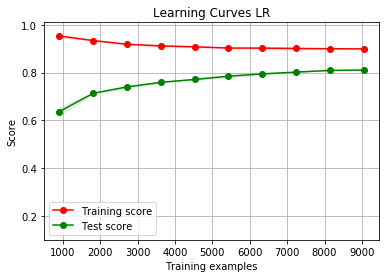

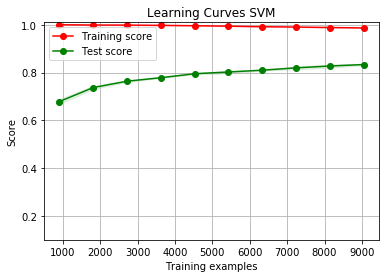

In [27]:
%matplotlib inline

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# Define learning curves plot function
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 10), scoring='f1_macro'):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, 
        scoring= scoring)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Test score")

    plt.legend(loc="best")
    return plt

# Algorithm Dictionary
estimators = {'LR':LogisticRegression(), 'SVM':LinearSVC()}

for (name,estimator) in estimators.items():
    title = "Learning Curves " + name
    # Random permutation cross-validator
    cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=0)
    plot_learning_curve(estimator, title, X, dataset.target, (0.1, 1.01), cv=cv, n_jobs=-1)

    plt.show()

----
# Precision - Recall Curve

In information retrieval, **precision** is a measure of result relevancy, while **recall** is a measure of how many truly relevant results are returned. A high **area under the curve (AUC)** represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).


A system with high recall but low precision returns many results, but most of its predicted labels are incorrect when compared to the training labels. A system with high precision but low recall is just the opposite, returning very few results, but most of its predicted labels are correct when compared to the training labels. An ideal system with high precision and high recall will return many results, with all results labeled correctly.

**Python Code Example**

/Users/kiddo/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


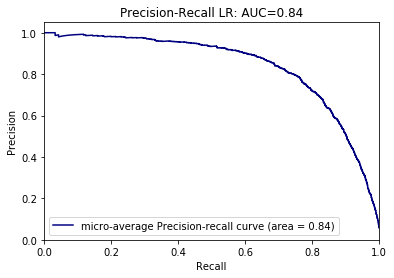

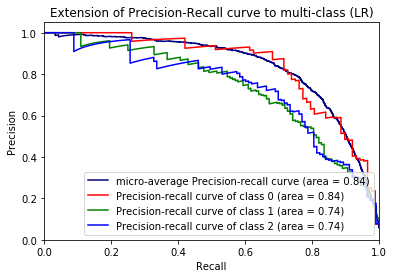

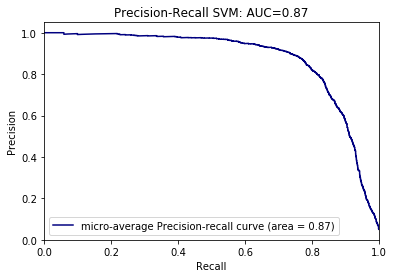

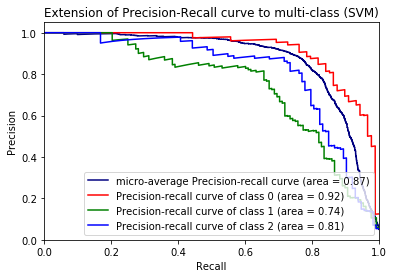

In [28]:
%matplotlib inline

# Import libraries
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier


# Binarize the output
y = label_binarize(dataset.target, classes=range(20))

# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,
                                                    random_state=0)

# Algorithm Dictionary
estimators = {'LR':LogisticRegression(), 'SVM':LinearSVC()}

# Loop over estimators
for (name,estimator) in estimators.items():
    
    # Fit model
    classifier = OneVsRestClassifier(estimator)
    y_score = classifier.fit(X_train, y_train).decision_function(X_test)

    # # Compute Precision-Recall and plot curve
    precision = dict()
    recall = dict()
    average_precision = dict()
    n_classes=20
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_score[:, i])
        average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])
    # Compute micro-average ROC curve and ROC area
    precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
        y_score.ravel())
    average_precision["micro"] = average_precision_score(y_test, y_score,
                                                         average="micro")


    # Plot Precision-Recall curve

    plt.clf()
    plt.plot(recall["micro"], precision["micro"], color='navy',
              label='micro-average Precision-recall curve (area = {0:0.2f})'
                    ''.format(average_precision["micro"]))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall {0}: AUC={1:0.2f}'.format(name,average_precision['micro']))
    plt.legend(loc="lower left")
    plt.show()
    
    
    # Plot Precision-Recall curve for each class
    plt.clf()
    plt.plot(recall["micro"], precision["micro"], color='navy',
             label='micro-average Precision-recall curve (area = {0:0.2f})'
                   ''.format(average_precision["micro"]))
    for i, color in zip(range(3), ['red','green','blue']):
        plt.plot(recall[i], precision[i], color=color,
                 label='Precision-recall curve of class {0} (area = {1:0.2f})'
                       ''.format(i, average_precision[i]))

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Extension of Precision-Recall curve to multi-class ({0})'.format(name))
    plt.legend(loc="lower right")
    plt.show()


----
# Parameter tuning

**Python Code Example**

In [29]:
# Import libraries
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

# Define pipeline
text_pipe = Pipeline([('vect', TfidfVectorizer()),
                      ('clf', LinearSVC()) ])

#Define parameters grid
param_grid = {'vect__ngram_range': [(1, 2), (1,3)],
              'vect__use_idf': (True, False),
              'clf__loss': ('hinge','squared_hinge'),
              'clf__C': (0.1, 0.5)}
                 
#Set-up Grid Search and start fit
grid = GridSearchCV(text_pipe, cv=3, n_jobs=2, param_grid=param_grid, verbose=3)
grid.fit(dataset.data[:10000], dataset.target[:10000])

#Print best option
print("Best options")
print("=======================================")
for param_name in sorted(param_grid.keys()):
     print("%s: %r" % (param_name, grid.best_params_[param_name]))




Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
/Users/kiddo/anaconda/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:  9.2min
[Parallel(n_jobs=2)]: Done  48 out of  48 | elapsed: 17.4min finished


Best options
clf__C: 0.5
clf__loss: 'squared_hinge'
vect__ngram_range: (1, 2)
vect__use_idf: True


In [30]:
predicted = grid.predict(dataset.data[10000:])
        
# Print metrics
from sklearn import metrics
print(metrics.classification_report(dataset.target[10000:], predicted,
     target_names=dataset.target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.95      0.98      0.97        60
           comp.graphics       0.85      0.88      0.86        73
 comp.os.ms-windows.misc       0.89      0.92      0.91        74
comp.sys.ibm.pc.hardware       0.85      0.84      0.84        67
   comp.sys.mac.hardware       0.92      0.89      0.91        65
          comp.windows.x       0.93      0.87      0.90        62
            misc.forsale       0.85      0.92      0.88        73
               rec.autos       0.94      0.94      0.94        72
         rec.motorcycles       0.97      0.92      0.95        66
      rec.sport.baseball       0.94      0.96      0.95        52
        rec.sport.hockey       0.96      0.94      0.95        71
               sci.crypt       0.96      0.94      0.95        77
         sci.electronics       0.91      0.91      0.91        65
                 sci.med       0.95      0.95      0.95        61
         